In [1]:
from manifold_helper import ManifoldHelper
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt

In [2]:
methods = ['ISOMAP', 'LLE', 'SE', 'LTSA']
neighbors = [5, 10, 25, 50, 75, 100, 150, 200]
dimensions = [2, 5, 10, 50, 100, 150, 200]
manifold = ManifoldHelper(megaman = False)

Using sklean manifold methods.


n_percent = 0.05


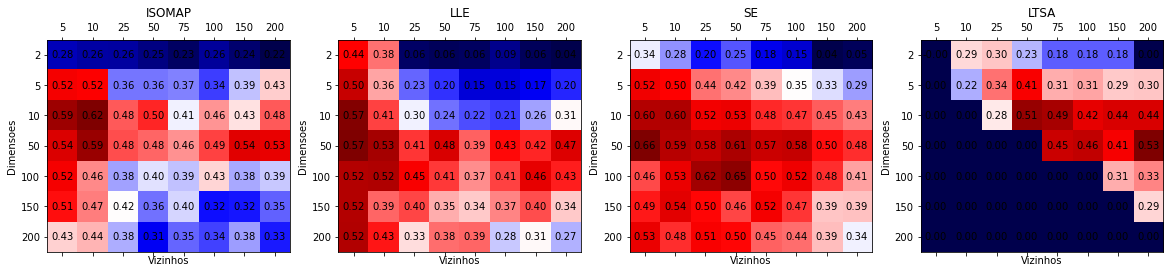

In [3]:
ari_results_8 = manifold.loadARI(methods, add='id_8')
print("n_percent = 0.05")
manifold.plot_ari_results(ari_results_8, neighbors, dimensions)

n_percent = 0.1


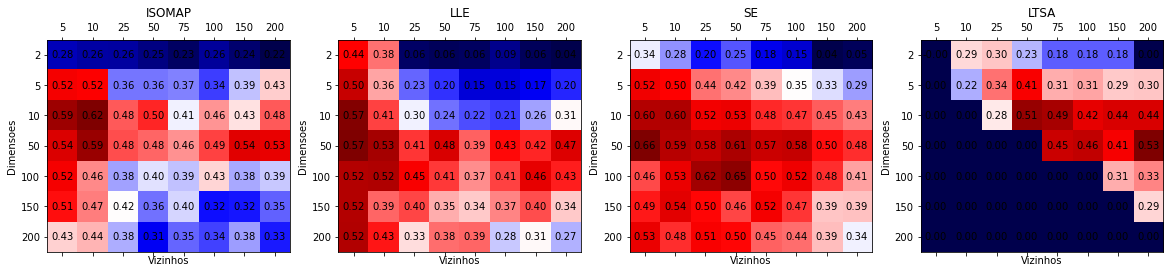

In [4]:
ari_results_7 = manifold.loadARI(methods, add='id_7')
print("n_percent = 0.1")
manifold.plot_ari_results(ari_results_8, neighbors, dimensions)

Quanto maior o valor, maior é o benefício de utilzar n_percent maior


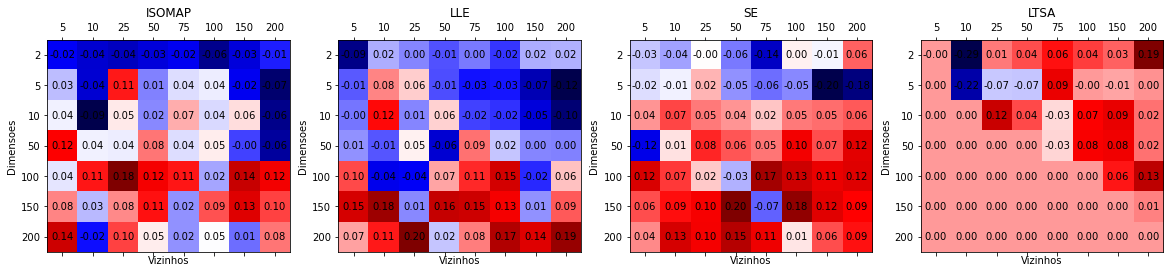

In [6]:
ari_results_diff = OrderedDict()
for m in methods:
    ari_results_diff[m] = ari_results_7[m] - ari_results_8[m]
print("Quanto maior o valor, maior é o benefício de utilzar n_percent maior")
manifold.plot_ari_results(ari_results_diff, neighbors, dimensions)